<a href="https://colab.research.google.com/github/n-west/Wideband-RF-Signal-Detection-with-Machine-Learning/blob/main/1_Minimize_a_quadratic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows an introduction to autograd by using the simple quadratic function

\begin{equation}
y = 2x^2 + 3x + 1
\end{equation}


In [ ]:
import torch
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

Torch has an internal library called autograd which provides automatic differentiation. This is a way of writing code which has the ability to compute *analytic* (rather than numeric) derivatives for functions.

We are going to use autograd Variable objects to do math and specify if this is something we want derivatives for or not. The following cell will define our function and plot it

tensor(2)
tensor(3)
tensor(1)


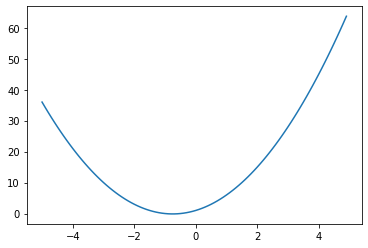

In [ ]:
torch.manual_seed(42)
a = torch.autograd.Variable(torch.tensor(2), requires_grad=False)
b = torch.autograd.Variable(torch.tensor(3), requires_grad=False)
c = torch.autograd.Variable(torch.tensor(1), requires_grad=False)
print(a) # Should be 2
print(b) # Should be 3
print(c) # Should be 1

def quadratic(x):
  # return x**2 + 1
  # return 2*x**2 + 1
  return 2*x**2 + 3 * x + 1

x_range = torch.autograd.Variable(torch.arange(-5, 5, .1), requires_grad=False)
y_range = quadratic(x_range)
plt.figure()
plt.plot(x_range.detach(), y_range.detach())

It is also possible to evaluate the function at specific points and use autograd to show the derivative at that point.

Let's start by analytically finding the derivative at $x=5$.

\begin{equation}
y = 2x^2 + 3x + 1
\end{equation}

\begin{equation}
\frac{\delta y}{\delta x} = 4x + 3
\end{equation}

\begin{equation}
\frac{\delta y}{\delta x}(5) = 23
\end{equation}

Now we can use autograd to do the same thing.

In [ ]:

x_5 = torch.autograd.Variable(torch.ones(1) * 5, requires_grad=True)
y_5 = a * torch.pow(x_5, 2) + b * x_5 + c

y_5.backward()
print(x_5.grad.data)

tensor([23.])


In optimization, we want to find the inputs which minimize the function. We can set the derivative to 0 to find the minimum.

\begin{equation}
y = 2x^2 + 3x + 1
\end{equation}

\begin{equation}
\frac{\delta y}{\delta x} = 4x + 3
\end{equation}

The minimum of y be solved by setting $\frac{\delta y}{\delta x} = 0$. 

\begin{equation}
  x = -3/4
\end{equation}

We can also use autograd to iteratively find this minimum. Keep adjusting some guess a little bit based on the derivative until we find the min.

In [ ]:
guess = torch.autograd.Variable(torch.ones(1) * .5, requires_grad=True)
for _ in range(25):
    y = quadratic(guess)
    y.backward()
    guess = guess.data - .1 * guess.grad.data

    guess = torch.autograd.Variable(guess, requires_grad=True)
    print(guess)

tensor([0.], requires_grad=True)
tensor([-0.3000], requires_grad=True)
tensor([-0.4800], requires_grad=True)
tensor([-0.5880], requires_grad=True)
tensor([-0.6528], requires_grad=True)
tensor([-0.6917], requires_grad=True)
tensor([-0.7150], requires_grad=True)
tensor([-0.7290], requires_grad=True)
tensor([-0.7374], requires_grad=True)
tensor([-0.7424], requires_grad=True)
tensor([-0.7455], requires_grad=True)
tensor([-0.7473], requires_grad=True)
tensor([-0.7484], requires_grad=True)
tensor([-0.7490], requires_grad=True)
tensor([-0.7494], requires_grad=True)
tensor([-0.7496], requires_grad=True)
tensor([-0.7498], requires_grad=True)
tensor([-0.7499], requires_grad=True)
tensor([-0.7499], requires_grad=True)
tensor([-0.7500], requires_grad=True)
tensor([-0.7500], requires_grad=True)
tensor([-0.7500], requires_grad=True)
tensor([-0.7500], requires_grad=True)
tensor([-0.7500], requires_grad=True)
tensor([-0.7500], requires_grad=True)


Newton's method is an iterative algorithm to find roots (zeros) which starts with a guess of the minimum. The guess is updated with the following rule:

\begin{equation}
x_1 = x - \frac{f(x)}{f'(x)}
\end{equation}

Starting with the analytic derivative we can use autograd to do the update rule.

In [ ]:

x = torch.autograd.Variable(torch.ones(1) * 5, requires_grad=True)
first = True
y = quadratic(x)

def dquad(x):
  return 4*x+3
for _ in range(21):
  y = dquad(x)
  y.backward(retain_graph=True, create_graph=True)
  deriv = x.grad.data.detach().clone()
  y.backward()
  print(f"{x.data} - {deriv} / {x.grad.data}")
  x = torch.autograd.Variable(x.data - y/(x.grad.data), requires_grad=True)

print(x)


tensor([5.]) - tensor([4.]) / tensor([8.])
tensor([2.1250]) - tensor([4.]) / tensor([8.])
tensor([0.6875]) - tensor([4.]) / tensor([8.])
tensor([-0.0312]) - tensor([4.]) / tensor([8.])
tensor([-0.3906]) - tensor([4.]) / tensor([8.])
tensor([-0.5703]) - tensor([4.]) / tensor([8.])
tensor([-0.6602]) - tensor([4.]) / tensor([8.])
tensor([-0.7051]) - tensor([4.]) / tensor([8.])
tensor([-0.7275]) - tensor([4.]) / tensor([8.])
tensor([-0.7388]) - tensor([4.]) / tensor([8.])
tensor([-0.7444]) - tensor([4.]) / tensor([8.])
tensor([-0.7472]) - tensor([4.]) / tensor([8.])
tensor([-0.7486]) - tensor([4.]) / tensor([8.])
tensor([-0.7493]) - tensor([4.]) / tensor([8.])
tensor([-0.7496]) - tensor([4.]) / tensor([8.])
tensor([-0.7498]) - tensor([4.]) / tensor([8.])
tensor([-0.7499]) - tensor([4.]) / tensor([8.])
tensor([-0.7500]) - tensor([4.]) / tensor([8.])
tensor([-0.7500]) - tensor([4.]) / tensor([8.])
tensor([-0.7500]) - tensor([4.]) / tensor([8.])
tensor([-0.7500]) - tensor([4.]) / tensor([8.])